In [30]:
import pandas as pd
import statistics as sts
import seaborn as srn


In [31]:
# Configurando o pandas ja que a tabela é pequena
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

dataset = pd.read_csv('dados/tempo.csv', sep=';')


dataset.head()

,Aparencia,Temperatura,Umidade,Vento,Jogar
0,sol,85,85.0,FALSO,nao
1,sol,80,90.0,VERDADEIRO,nao
2,nublado,83,86.0,FALSO,sim
3,chuva,70,NaN,FALSO,sim
4,chuva,68,80.0,FALSO,sim


In [32]:
# Verificando os dados em branco
dataset.isnull().sum()

Aparencia      0
Temperatura    0
Umidade        1
Vento          1
Jogar          0
dtype: int64

In [33]:
dataset

,Aparencia,Temperatura,Umidade,Vento,Jogar
0,sol,85,85.0,FALSO,nao
1,sol,80,90.0,VERDADEIRO,nao
2,nublado,83,86.0,FALSO,sim
3,chuva,70,NaN,FALSO,sim
4,chuva,68,80.0,FALSO,sim
5,chuva,65,70.0,VERDADEIRO,nao
6,menos,64,65.0,VERDADEIRO,sim
7,sol,1220,95.0,FALSO,nao
8,sol,69,70.0,FALSO,sim
9,chuva,75,200.0,NaN,sim


In [34]:
dataset.shape

(14, 5)

# Tratamento Aparencia

In [35]:
# Como é uma tabela pequena vou agrupar os dados
agrupado_aparencia = dataset.groupby(['Aparencia']).size()
agrupado_aparencia


Aparencia
chuva      5
menos      1
nublado    3
sol        5
dtype: int64

In [36]:
dataset['Aparencia'].describe()

count      14
unique      4
top       sol
freq        5
Name: Aparencia, dtype: object

In [37]:
# Tratando o dado
dataset.loc[dataset['Aparencia'] == 'menos', 'Aparencia'] = 'chuva'

In [38]:
agrupado_aparencia = dataset.groupby(['Aparencia']).size()
agrupado_aparencia

Aparencia
chuva      6
nublado    3
sol        5
dtype: int64

# Tratamento de temperatura

In [39]:
dataset['Temperatura'].describe()

count      14.000000
mean      155.571429
std       306.433759
min        64.000000
25%        69.250000
50%        73.500000
75%        80.750000
max      1220.000000
Name: Temperatura, dtype: float64

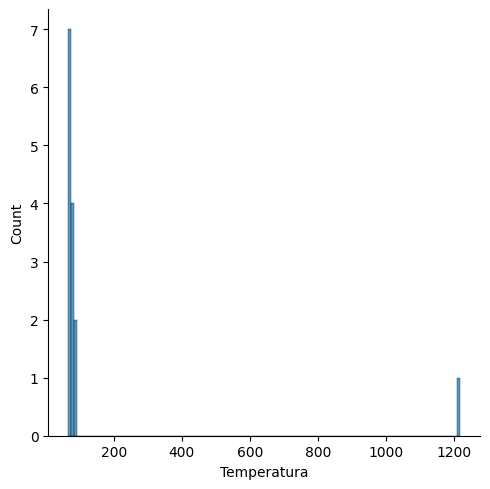

In [40]:
srn.displot(dataset['Temperatura'])

In [41]:
media_temperatura = int(sts.median(dataset['Temperatura']))
media_temperatura

73

In [42]:
# Localizando e Substituindo 
dataset.loc[(dataset['Temperatura'] > 130) | (dataset['Temperatura'] < - 130), 'Temperatura'] = media_temperatura

In [43]:
# Verificando que o valor foi alterado
dataset.loc[(dataset['Temperatura'] > 130) | (dataset['Temperatura'] < - 130)]

,Aparencia,Temperatura,Umidade,Vento,Jogar


# Tratando umidade

In [44]:
dataset['Umidade'].describe()

count     13.000000
mean      89.769231
std       34.540203
min       65.000000
25%       70.000000
50%       85.000000
75%       90.000000
max      200.000000
Name: Umidade, dtype: float64

In [45]:
media_umidade = sts.median(dataset['Umidade'])
media_umidade

85.5

In [46]:
dataset.loc[dataset['Umidade'] > 100, 'Umidade'] = media_umidade

In [47]:
dataset.loc[dataset['Umidade'].isna(), 'Umidade'] = media_umidade

In [48]:
dataset['Umidade'].describe()

count    14.000000
mean     81.285714
std       9.585073
min      65.000000
25%      71.250000
50%      85.250000
75%      89.000000
max      95.000000
Name: Umidade, dtype: float64

# Trabalhando com Vento

In [49]:
agrupamento_vento = dataset.groupby(['Vento']).size()
agrupamento_vento

Vento
FALSO         7
VERDADEIRO    6
dtype: int64

In [51]:
dataset.loc[dataset['Vento'].isna(), 'Vento'] = 'Falso'

In [52]:
dataset

,Aparencia,Temperatura,Umidade,Vento,Jogar
0,sol,85,85.0,FALSO,nao
1,sol,80,90.0,VERDADEIRO,nao
2,nublado,83,86.0,FALSO,sim
3,chuva,70,85.5,FALSO,sim
4,chuva,68,80.0,FALSO,sim
5,chuva,65,70.0,VERDADEIRO,nao
6,chuva,64,65.0,VERDADEIRO,sim
7,sol,73,95.0,FALSO,nao
8,sol,69,70.0,FALSO,sim
9,chuva,75,85.5,Falso,sim


In [53]:
# Salvando
dataset.to_csv('dados/novo_clima.csv', index=False)